# Leukemia (ALL)

# Importar paquetes

El paquete "os"  se usa para leer archivos y la estructura de directorios.

"matplotlib.pyplot" para trazar el gráfico y mostrar imágenes en los datos de entrenamiento y validación.

"Tensorflow" y las clases de "Keras" necesarias para construir nuestro modelo.

In [1]:
#Importando las librerias necesarias
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Cargar datos

Comience descargando el conjunto de datos que se encuentra en el Readme, para luego poder acceder a ellos.

##### El conjunto de datos tiene la siguiente estructura de directorios:

In [2]:
train_dir  = os.path.abspath(r"C:/Users/estilos/Documents/Developer/Anaconda_Proyects/Python/Datasets/BD/Leukemia/C-NMC_ALL_AND_HEM/Train")
validation_dir = os.path.abspath(r"C:/Users/estilos/Documents/Developer/Anaconda_Proyects/Python/Datasets/BD/Leukemia/C-NMC_ALL_AND_HEM/Validation")
train_healthy_cells = os.path.join(train_dir,'all')
train_hem_cells = os.path.join(train_dir, 'hem')
validation_healthy_cells = os.path.join(validation_dir, 'all')
validation_hem_cells = os.path.join(validation_dir, 'hem')

### Comprender los datos
Veamos cuántas imágenes de ALL y HEM hay en el directorio de entrenamiento y validación:

In [3]:
num_all_tr = len(os.listdir(train_healthy_cells))
num_hem_tr = len(os.listdir(train_hem_cells))

num_all_val = len(os.listdir(validation_healthy_cells))
num_hem_val = len(os.listdir(validation_hem_cells))

total_train  = num_all_tr + num_hem_tr
total_val = num_all_val + num_hem_val

In [4]:
print('Total de imagenes de entrenamiento (ALL) :', num_all_tr)
print('Total de imagenes de entrenamiento (HEM) :', num_hem_tr)
print("--")
print('Total de imagenes de validación (ALL) :', num_all_val)
print('Total de imagenes de validación (HEM) :', num_hem_val)
print("--")
print("Total de imagenes de entrenamiento :", total_train)
print("Total de imagenes de validación:", total_val)

Total de imagenes de entrenamiento (ALL) : 2397
Total de imagenes de entrenamiento (HEM) : 1130
--
Total de imagenes de validación (ALL) : 2418
Total de imagenes de validación (HEM) : 1163
--
Total de imagenes de entrenamiento : 3527
Total de imagenes de validación: 3581


In [5]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

### Preparación de datos

Formatee las imágenes en tensores de punto flotante preprocesados adecuadamente antes de alimentar a la red:

    * Leer imágenes del disco.
    * Decodificar el contenido de estas imágenes y conviértalo al formato de cuadrícula adecuado según su   
      contenido RGB.
    * Convertir en tensores de coma flotante.
    * Cambiar la escala de los tensores de valores entre 0 y 255 a valores entre 0 y 1, ya que para las redes 
      neuronales es mejor trabajar con valores de entrada pequeños.

Todas estas tareas se pueden hacer con "ImageDataGenerator" proporcionada por "tf.keras". Puede leer imágenes del disco y preprocesarlas en tensores adecuados. También establecerá generadores que conviertan estas imágenes en lotes de tensores, lo que es útil para entrenar la red.

In [6]:
image_gen_train = ImageDataGenerator(rescale=1./255)
image_gen_val = ImageDataGenerator(rescale=1./255)

In [7]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 3527 images belonging to 2 classes.


In [8]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 3581 images belonging to 2 classes.


### Visualiza imágenes de entrenamiento

Visualice las imágenes de entrenamiento extrayendo un lote de imágenes del generador de entrenamiento, luego trace cinco de ellas matplotlib.

In [10]:
sample_training_images, _ = next(train_data_gen)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

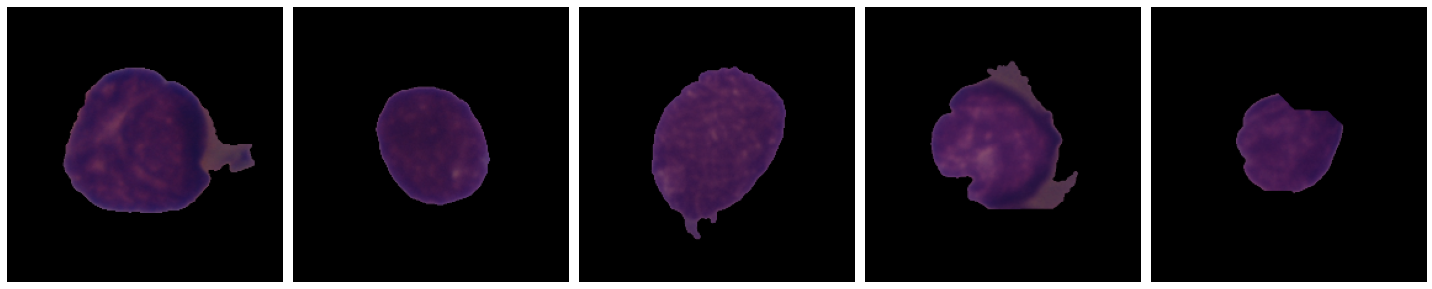

In [12]:
plotImages(sample_training_images[:5])

### Crea el modelo

El modelo consta de tres bloques de convolución con una capa de agrupación máxima en cada uno de ellos. Hay una capa completamente conectada con 256 unidades encima que se activa mediante una función "relu".

In [13]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation = "softmax")
])

### Compilar el modelo

Se utiliza optimizador "ADAM" y la función de pérdida de entropía cruzada categorica . Para ver la precisión de entrenamiento y validación para cada época de entrenamiento el argumento "metrics".

In [14]:
model.compile(optimizer=optimizers.Adam(lr = 0.0005),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

##### Resumen Modelo

Ver todas las capas de la red utilizando el método "summary" :

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

### Entrenar a la modelo

Se usa el método "fit_generator" de "ImageDataGenerator" para entrenar la red.

In [16]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 27 steps, validate for 27 steps
Epoch 1/15
27/27 [==============================] - 321s 12s/step - loss: 0.4783 - accuracy: 0.7891 - val_loss: 0.4055 - val_accuracy: 0.8348
Epoch 2/15
27/27 [==============================] - 279s 10s/step - loss: 0.4303 - accuracy: 0.8249 - val_loss: 0.3959 - val_accuracy: 0.8348
Epoch 3/15
27/27 [==============================] - 287s 11s/step - loss: 0.4189 - accuracy: 0.8232 - val_loss: 0.4060 - val_accuracy: 0.8278
Epoch 4/15
27/27 [==============================] - 206s 8s/step - loss: 0.3993 - accuracy: 0.8341 - val_loss: 0.3856 - val_accuracy: 0.8417
Epoch 5/15
27/27 [==============================] - 168s 6s/step - loss: 0.3836 - accuracy: 0.8347 - val_loss: 0.3823 - val_accuracy: 0.8423
Epoch 6/15
27/27 [==============================] - 163s 6s/step - loss: 0.3746 - accuracy: 0.8488 - val_loss: 0.3754 - val_

### Visualizar resultados de entrenamiento

Ahora visualice los resultados después de entrenar la red.

In [17]:
plt.style.use('ggplot')

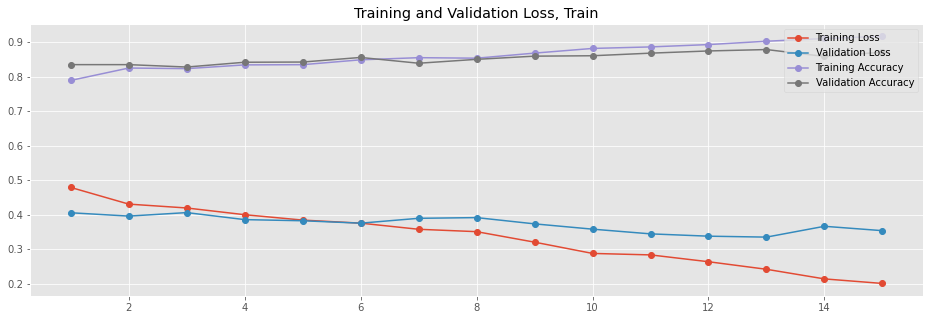

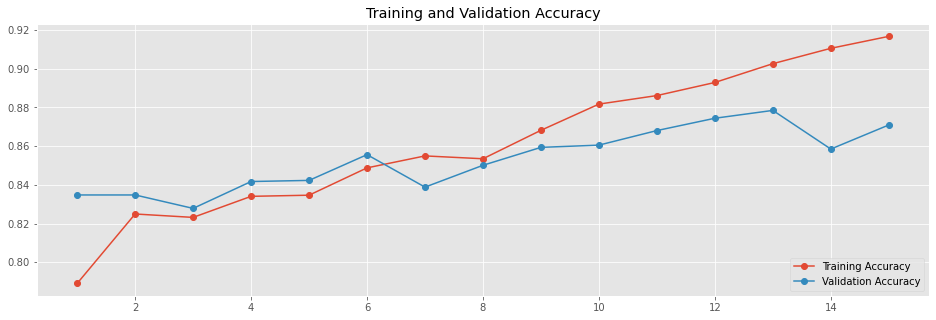

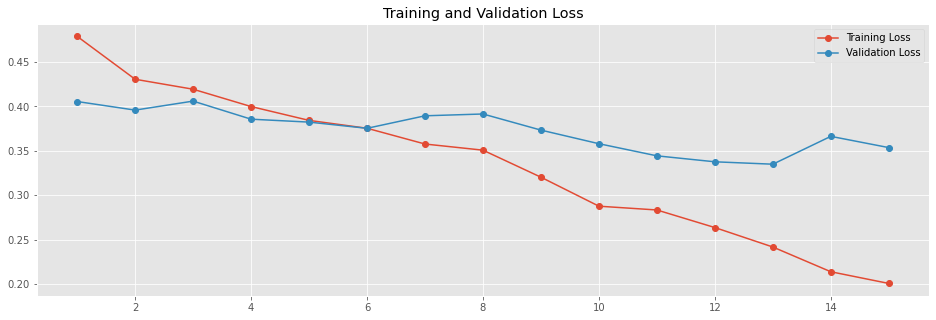

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(1,epochs+1)
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss',marker = 'o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker = 'o')
plt.plot(epochs_range, acc, label='Training Accuracy',marker = 'o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',marker = 'o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, Train')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs_range, acc, label='Training Accuracy',marker = 'o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',marker = 'o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss',marker = 'o')
plt.plot(epochs_range, val_loss, label='Validation Loss',marker = 'o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

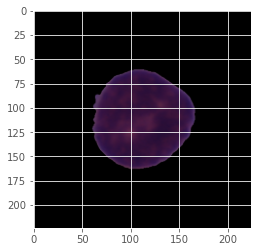

In [60]:
new_image = plt.imread("C:/Users/estilos/Documents/Developer/Anaconda_Proyects/Python/Datasets/BD/Leukemia/17.bmp")
from skimage.transform import resize
resized_image = resize(new_image, (224,224,3))
img = plt.imshow(resized_image)

[[% Célula cancerosa,  % Celula Sana]]
[[0.86892277 0.13107729]]


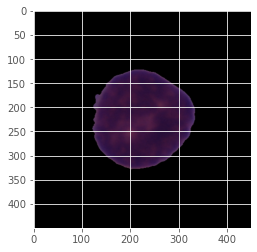

In [68]:
predictions = model.predict(np.array( [resized_image] ))
img = plt.imshow(new_image)
print("[[% Célula cancerosa,  % Celula Sana]]")
print(predictions)